In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [67]:
stasiun1 = pd.read_csv('C:\\Users\\fayme amelia celesta\\Documents\\VScode\\Python\\Explore\\Time Series\\SARIMA\\stasiun_1_intrp.csv')

In [68]:
stasiun1

,Unnamed: 0,Tavg,RH_avg,RR,ss,ddd_x,ff_avg
0,2016-01-01,28.6,81.0,9.239964,5.8,280.0,2.0
1,2016-01-02,27.0,88.0,1.600000,8.7,290.0,2.0
2,2016-01-03,28.1,80.0,33.800000,5.4,280.0,2.0
3,2016-01-04,29.2,81.0,23.800000,6.6,200.0,1.0
4,2016-01-05,26.7,91.0,13.800000,3.2,180.0,1.0
...,...,...,...,...,...,...,...
1822,2020-12-27,29.0,74.0,0.000000,5.7,240.0,2.0
1823,2020-12-28,28.1,77.0,0.050000,6.8,240.0,3.0
1824,2020-12-29,27.1,82.0,0.100000,6.1,240.0,3.0
1825,2020-12-30,27.0,81.0,0.300000,1.4,260.0,2.0


In [69]:
stasiun1.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
stasiun1['date'] = pd.to_datetime(stasiun1['date'])

In [71]:
def get_model(data, column):
    df_train = data[['date', column]]
    df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
    
    my_model = Prophet()
    my_model.fit(df_train)
    
    return my_model

### Create Rainfall Prediction Model

In [72]:
model_RR = get_model(stasiun1, 'RR')

16:06:20 - cmdstanpy - INFO - Chain [1] start processing
16:06:20 - cmdstanpy - INFO - Chain [1] done processing


In [73]:
future_dates = model_RR.make_future_dataframe(periods=365, freq='D')
future_dates.shape[0]

2192

In [74]:
forecast = model_RR.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-01,14.519341,-3.548266,33.370946
1,2016-01-02,14.446213,-3.047389,32.751755
2,2016-01-03,15.003346,-1.905842,34.251404
3,2016-01-04,14.855716,-4.553877,32.173947
4,2016-01-05,16.005391,-2.325778,34.823826


c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


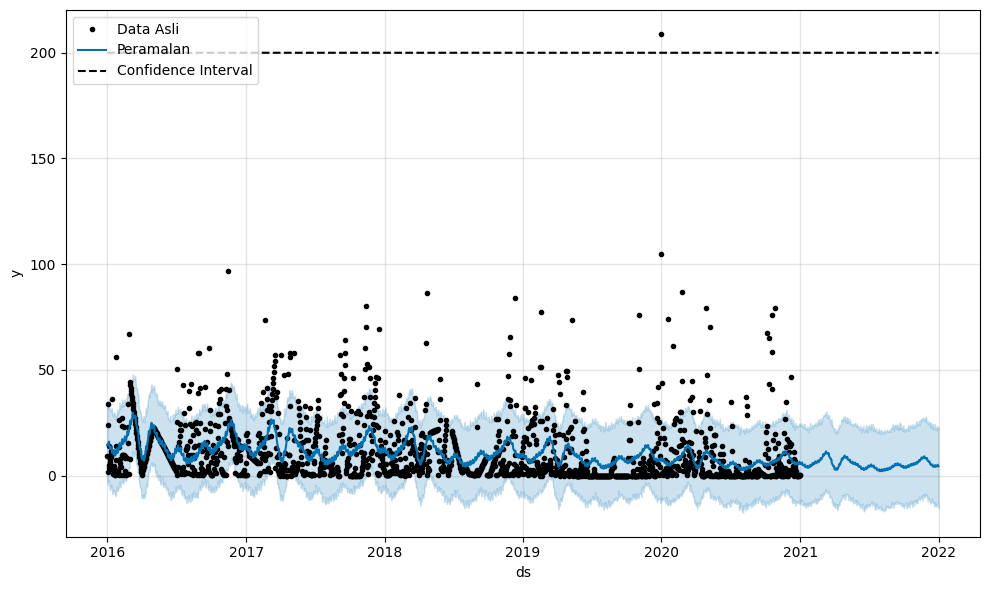

In [75]:
model_RR.plot(forecast, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [76]:
def triple_metric(forecast, column):
    mae = mean_absolute_error(forecast['yhat'][len(forecast)-720:-355], stasiun1[column][len(stasiun1)-365:])
    print('Mean Absolute Error : ',mae)
    mse = mean_squared_error(forecast['yhat'][len(forecast)-720:-355], stasiun1[column][len(stasiun1)-365:])
    print('Mean Squared Error : ',mse)
    mape = mean_absolute_percentage_error(forecast['yhat'][len(forecast)-720:-355], stasiun1[column][len(stasiun1)-365:])
    print('Mean Absolute Percentage Error : ',mape)

In [77]:
triple_metric(forecast, 'RR')

Mean Absolute Error :  8.516174921465419
Mean Squared Error :  203.5111059256271
Mean Absolute Percentage Error :  1.2807256690087243


In [78]:
predict_res_rr = forecast['yhat'][len(forecast)-720:-355]

### Create Sunshine Duration Prediction Model

In [79]:
model_ss = get_model(stasiun1, 'ss')

C:\Users\thebl\AppData\Local\Temp\ipykernel_28280\1345731877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
16:06:24 - cmdstanpy - INFO - Chain [1] start processing
16:06:24 - cmdstanpy - INFO - Chain [1] done processing


In [80]:
future_dates = model_ss.make_future_dataframe(periods=365, freq='D')
forecast = model_ss.predict(future_dates)

c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


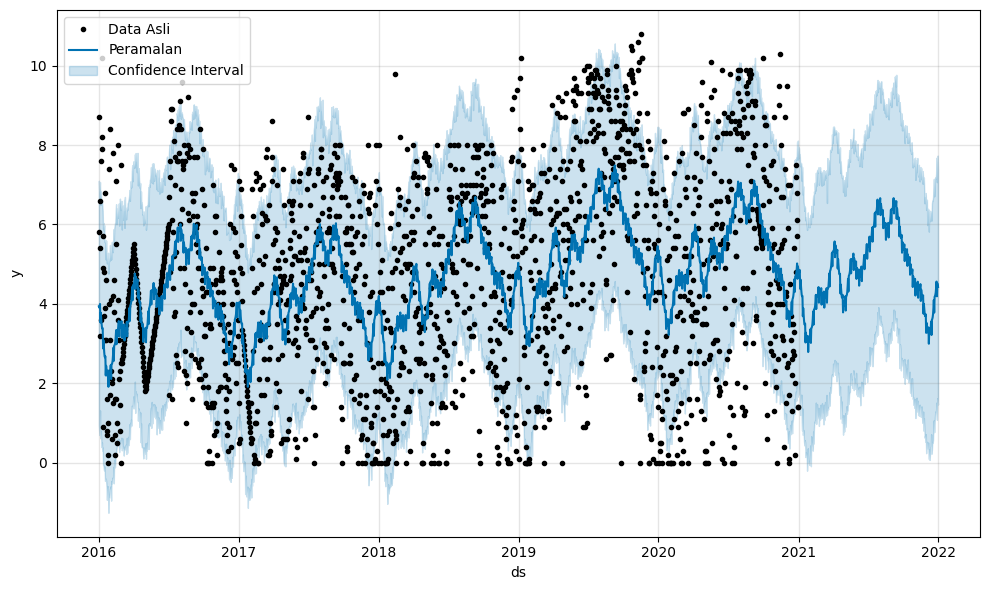

In [81]:
model_ss.plot(forecast, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [82]:
triple_metric(forecast, 'ss')

Mean Absolute Error :  2.251154041617564
Mean Squared Error :  7.341145410100989
Mean Absolute Percentage Error :  0.4463960956618233


In [83]:
predict_res_ss = forecast['yhat'][len(forecast)-720:-355]

### Create Average Wind Direction Predict Model

In [84]:
model_ddd = get_model(stasiun1, 'ddd_x')

C:\Users\thebl\AppData\Local\Temp\ipykernel_28280\1345731877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
16:06:25 - cmdstanpy - INFO - Chain [1] start processing
16:06:25 - cmdstanpy - INFO - Chain [1] done processing


In [85]:
future_dates = model_ddd.make_future_dataframe(periods=365, freq='D')
forecast = model_ddd.predict(future_dates)

c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


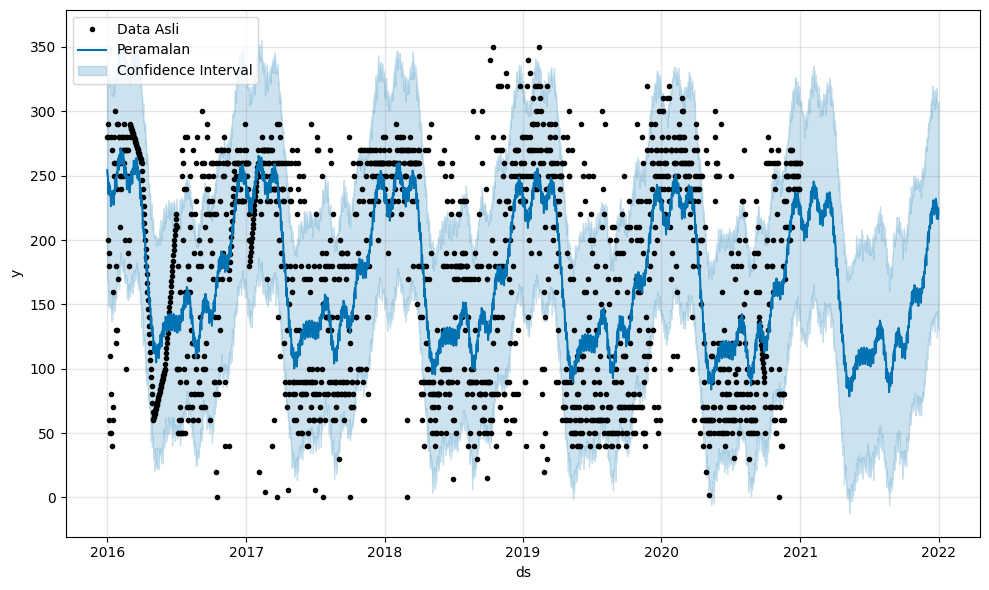

In [86]:
model_ddd.plot(forecast, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [87]:
triple_metric(forecast, 'ddd_x')

Mean Absolute Error :  53.08291616163778
Mean Squared Error :  4340.307408843931
Mean Absolute Percentage Error :  0.3707663071180354


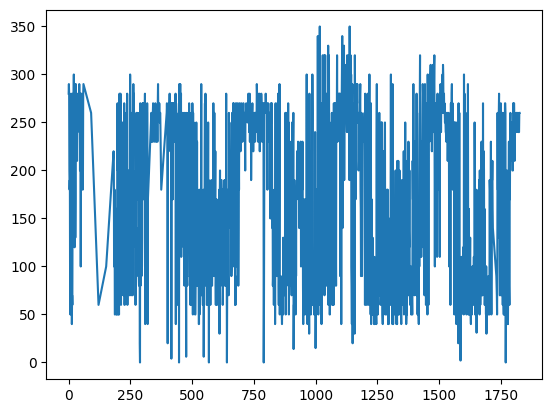

In [88]:
plt.plot(stasiun1['ddd_x'])

In [89]:
df_copy = stasiun1.copy()
df_copy.head()

,date,Tavg,RH_avg,RR,ss,ddd_x,ff_avg
0,2016-01-01,28.6,81.0,9.239964,5.8,280.0,2.0
1,2016-01-02,27.0,88.0,1.600000,8.7,290.0,2.0
2,2016-01-03,28.1,80.0,33.800000,5.4,280.0,2.0
3,2016-01-04,29.2,81.0,23.800000,6.6,200.0,1.0
4,2016-01-05,26.7,91.0,13.800000,3.2,180.0,1.0


In [90]:
# Change the measure into radiant
df_copy['ddd_x'] = df_copy['ddd_x'].apply(lambda x: x * np.pi / 180)
df_copy.head()

,date,Tavg,RH_avg,RR,ss,ddd_x,ff_avg
0,2016-01-01,28.6,81.0,9.239964,5.8,4.886922,2.0
1,2016-01-02,27.0,88.0,1.600000,8.7,5.061455,2.0
2,2016-01-03,28.1,80.0,33.800000,5.4,4.886922,2.0
3,2016-01-04,29.2,81.0,23.800000,6.6,3.490659,1.0
4,2016-01-05,26.7,91.0,13.800000,3.2,3.141593,1.0


Text(0.5, 1.0, 'ddd_x after convert into radiant')

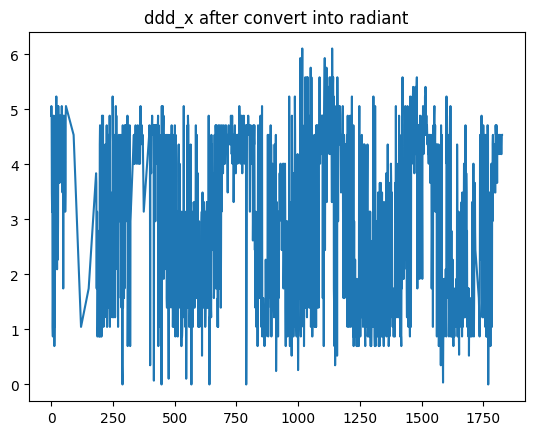

In [91]:
plt.plot(df_copy['ddd_x'])
plt.title('ddd_x after convert into radiant')

In [92]:
model_ddd_2 = get_model(df_copy, 'ddd_x')

C:\Users\thebl\AppData\Local\Temp\ipykernel_28280\1345731877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
16:06:26 - cmdstanpy - INFO - Chain [1] start processing
16:06:27 - cmdstanpy - INFO - Chain [1] done processing


In [93]:
future_dates = model_ddd_2.make_future_dataframe(periods=365, freq='D')
forecast = model_ddd_2.predict(future_dates)

c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


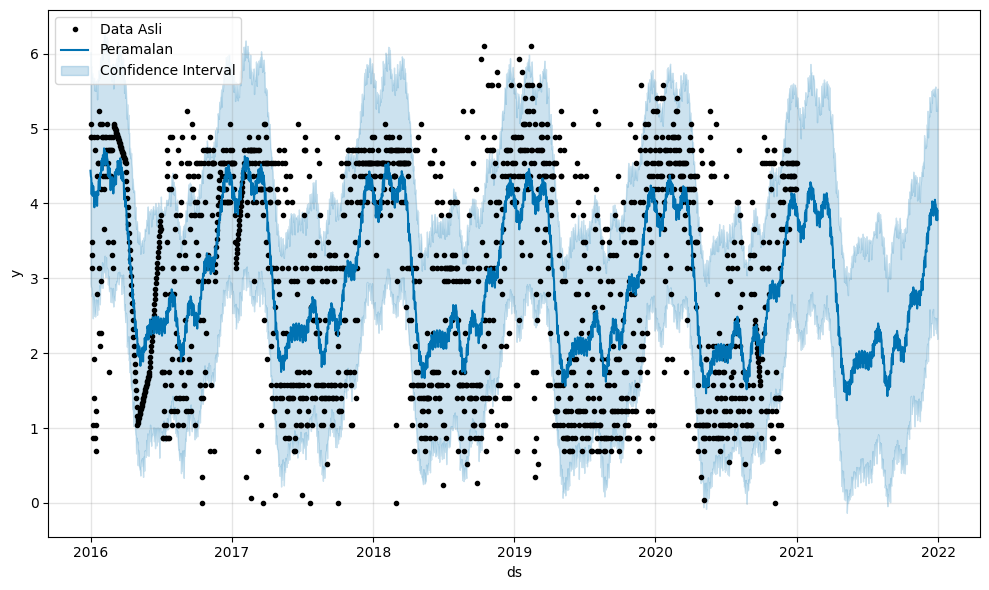

In [94]:
model_ddd_2.plot(forecast, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [95]:
mae = mean_absolute_error(forecast['yhat'][len(forecast)-720:-355], df_copy['ddd_x'][len(df_copy)-365:])
print('Mean Absolute Error : ',mae)
mse = mean_squared_error(forecast['yhat'][len(forecast)-720:-355], df_copy['ddd_x'][len(df_copy)-365:])
print('Mean Squared Error : ',mse)
mape = mean_absolute_percentage_error(forecast['yhat'][len(forecast)-720:-355], df_copy['ddd_x'][len(df_copy)-365:])
print('Mean Absolute Percentage Error : ',mape)

Mean Absolute Error :  0.9264544083015103
Mean Squared Error :  1.3220923068163482
Mean Absolute Percentage Error :  0.37073456776048813


In [96]:
predict_res_ddd = forecast['yhat'][len(forecast)-720:-355]

### Create Humidity Prediction Model

C:\Users\thebl\AppData\Local\Temp\ipykernel_28280\1345731877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
16:06:27 - cmdstanpy - INFO - Chain [1] start processing


16:06:28 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


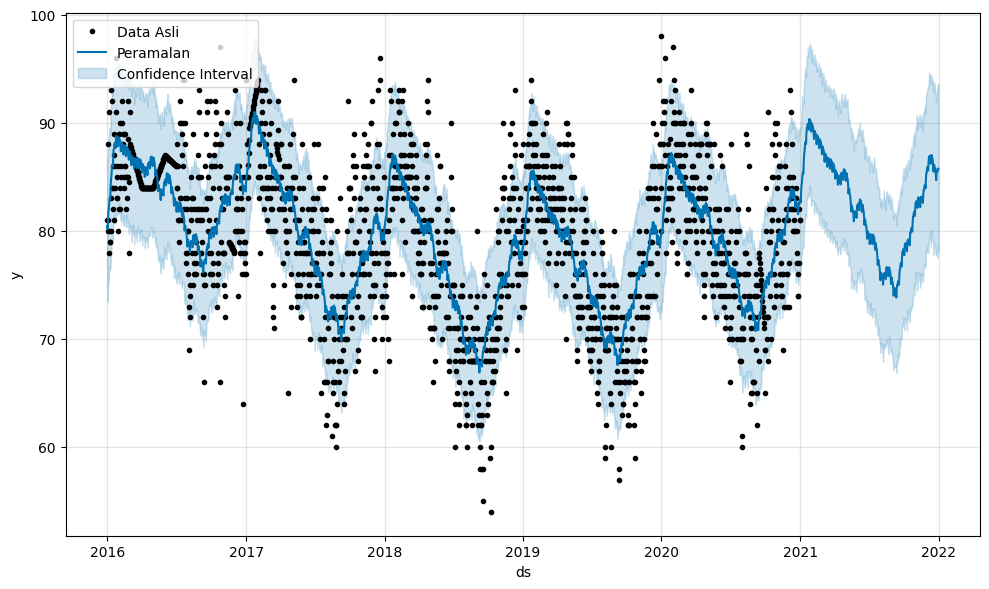

In [97]:
model_RH = get_model(stasiun1, 'RH_avg')
future_dates = model_RH.make_future_dataframe(periods=365, freq='D')
forecast = model_RH.predict(future_dates)

model_RH.plot(forecast, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [98]:
triple_metric(forecast, 'RH_avg')

Mean Absolute Error :  4.138728364305093
Mean Squared Error :  26.779884571568633
Mean Absolute Percentage Error :  0.05219402040077517


In [99]:
predict_res_rh = forecast['yhat'][len(forecast)-720:-355]

### Creating Wind Speed Average Prediction Model

C:\Users\thebl\AppData\Local\Temp\ipykernel_28280\1345731877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
16:06:28 - cmdstanpy - INFO - Chain [1] start processing
16:06:28 - cmdstanpy - INFO - Chain [1] done processing


c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


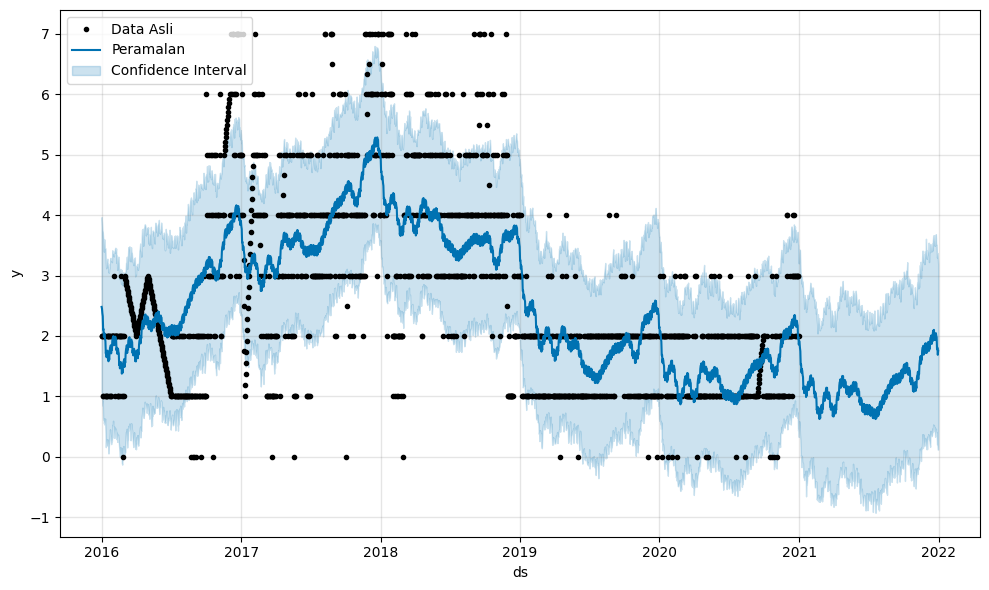

In [100]:
model_ff = get_model(stasiun1, 'ff_avg')
future_dates = model_ff.make_future_dataframe(periods=365, freq='D')
forecast = model_ff.predict(future_dates)

model_ff.plot(forecast, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [101]:
triple_metric(forecast, 'ff_avg')

Mean Absolute Error :  0.6127728982599657
Mean Squared Error :  0.5828328319455339
Mean Absolute Percentage Error :  0.44873515368045286


In [102]:
predict_res_ff = forecast['yhat'][len(forecast)-720:-355]

### Create Average Temperature Prediction Model

C:\Users\thebl\AppData\Local\Temp\ipykernel_28280\1345731877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
16:06:29 - cmdstanpy - INFO - Chain [1] start processing
16:06:29 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to

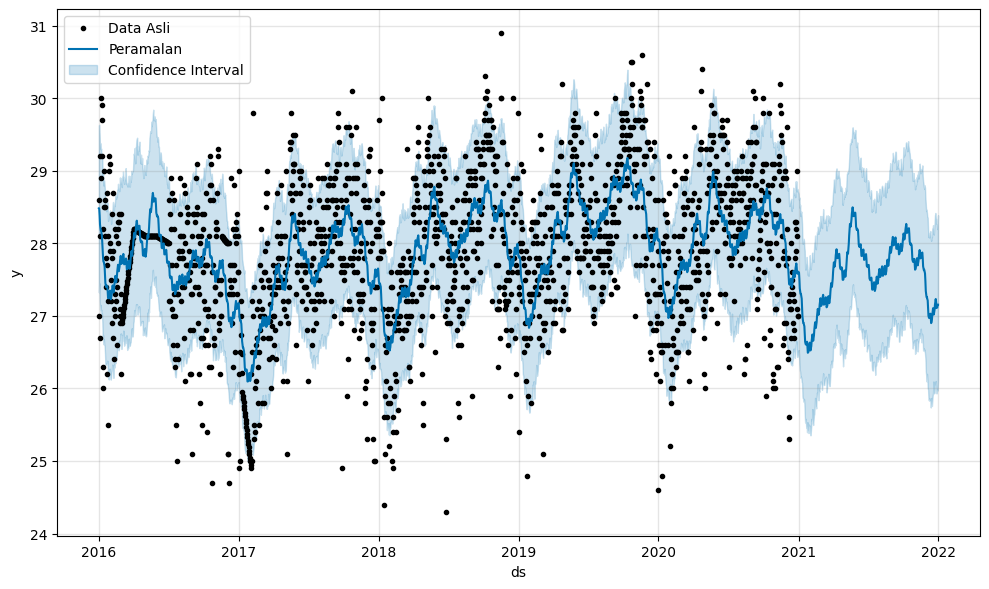

In [103]:
model_T = get_model(stasiun1, 'Tavg')
future_dates = model_T.make_future_dataframe(periods=365, freq='D')
forecast = model_T.predict(future_dates)

model_T.plot(forecast, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [104]:
triple_metric(forecast, 'Tavg')

Mean Absolute Error :  0.7665723751731668
Mean Squared Error :  0.908312352587604
Mean Absolute Percentage Error :  0.02737373627157782


In [105]:
predict_res_t = forecast['yhat'][len(forecast)-720:-355]

### Classification Time !!

In [106]:
import pickle

# Buka file pickle
with open('best_classify.pkl', 'rb') as f:
    rf_model = pickle.load(f)

In [107]:
predict_res_rr = predict_res_rr.to_frame(name='RR')
predict_res_t = predict_res_t.to_frame(name='Tavg')
predict_res_rh = predict_res_rh.to_frame(name='RH_avg')
predict_res_ss = predict_res_ss.to_frame(name='ss')
predict_res_ff = predict_res_ff.to_frame(name='ff_avg')
predict_res_ddd = predict_res_ddd.to_frame(name='ddd_x')

In [108]:
predict_res_rr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 1472 to 1836
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RR      365 non-null    float64
dtypes: float64(1)
memory usage: 3.0 KB


In [109]:
pred_res_2020 = pd.concat([predict_res_t, predict_res_rh, predict_res_ss, predict_res_ddd, predict_res_ff, predict_res_rr], axis=1)

In [110]:
pred_res_2020['region_name_Jakarta Selatan'] = 1
pred_res_2020['region_name_Jakarta Timur'] = 0
pred_res_2020['region_name_Jakarta Utara'] = 0

In [111]:
def convert_radian_to_degree(radian):
    return radian * (180 / np.pi)

pred_res_2020['ddd_x'] = pred_res_2020['ddd_x'].apply(convert_radian_to_degree)

In [112]:
pred_res_2020

,Tavg,RH_avg,ss,ddd_x,ff_avg,RR,region_name_Jakarta Selatan,region_name_Jakarta Timur,region_name_Jakarta Utara
1472,27.541450,83.789862,4.476094,215.394743,1.534712,6.077462,1,0,0
1473,27.404223,84.481873,4.481403,204.248915,1.506248,5.903250,1,0,0
1474,27.359641,84.656791,3.972455,214.266899,1.310517,6.394641,1,0,0
1475,27.322326,85.171795,4.181301,212.062296,1.354631,6.415407,1,0,0
1476,27.326277,85.436770,4.026902,208.555453,1.265039,4.970457,1,0,0
...,...,...,...,...,...,...,...,...,...
1832,27.304430,84.903598,4.610555,213.060017,1.526397,6.174924,1,0,0
1833,27.303008,85.234364,4.467709,207.617448,1.393903,5.020683,1,0,0
1834,27.268485,85.427483,4.334613,215.206690,1.454732,5.000831,1,0,0
1835,27.238613,85.325428,4.229278,211.615166,1.424339,4.858528,1,0,0


<Axes: >

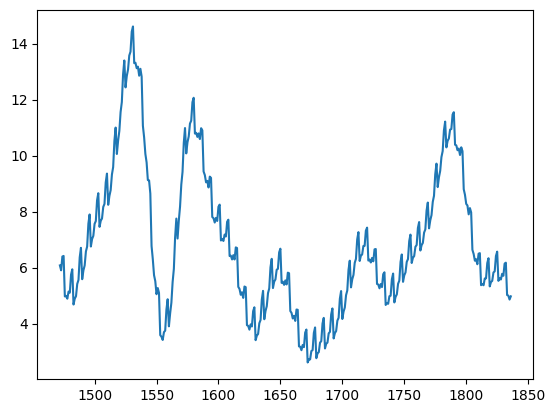

In [113]:
pred_res_2020['RR'].plot()

In [114]:
flood_predict = rf_model.predict(pred_res_2020)

In [115]:
flood_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [116]:
sum = np.sum(flood_predict == 1)

In [117]:
sum

34